## Import Dependencies

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics

## Data Collection 

In [4]:
sales_data = pd.read_csv("Big Mart Data Train.csv")

In [5]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# Number of data points and number of features
sales_data.shape

(8523, 12)

In [7]:
# Getting some information about the dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Categorical Features: 
- Item_Identifier </br>
- Item_Fat_Content</br>
- Item_Type</br>
- Outlet_Identifier   </br>
- Outlet_Size </br>
- Outlet_Location_Type</br>
- Outlet_Type </br>


In [8]:
# Checking for missing value
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Handling the missing value
Mean: Average Value</br>
Mode: Most repeated value</br>

In [9]:
# Mean value of Item-Weight Column
sales_data['Item_Weight'].mean()

12.857645184135976

In [10]:
# Filling the Missing values in Item-Weight column with mean value
sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean(), inplace = True)

In [11]:
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
# Filling the Missing values in Outlet Size column with mode value
mode_sales_data = sales_data.pivot_table(values = 'Outlet_Size', 
                                         columns = 'Outlet_Type', 
                                         aggfunc=(lambda x:x.mode()[0]))

In [14]:
mode_sales_data

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


We will replace null values of Outlet_Size with the mode value of Corresponding Outlet_Type

In [15]:
missing_values = sales_data['Outlet_Size'].isnull()

In [16]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [33]:
#Replace using the missing_value and model_Sales_data
sales_data.loc[missing_values,'Outlet_Size'] = sales_data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_sales_data[x])

In [18]:
sales_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Data Analysis

In [19]:
# Statistical Measures 
sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


###  Numerical Features PLot

In [20]:
sns.set() # provide themes for the plots

C:\Users\subit\AppData\Local\Temp\ipykernel_5592\2872971324.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_Weight'])


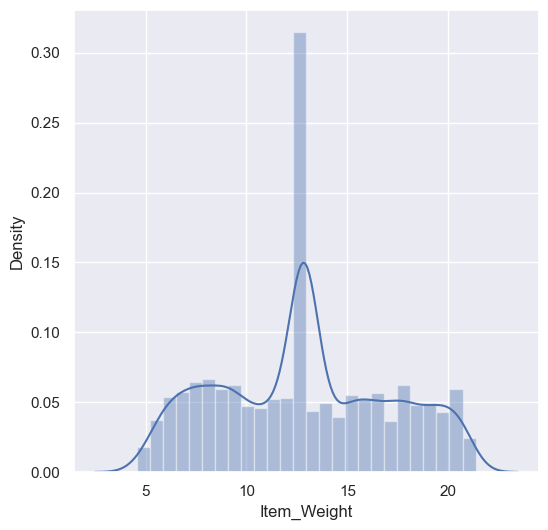

In [21]:
# Item-Weight Distribution
plt.figure(figsize=(6,6))
sns.distplot(sales_data['Item_Weight'])
plt.show()

C:\Users\subit\AppData\Local\Temp\ipykernel_5592\2539608818.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_Visibility'])


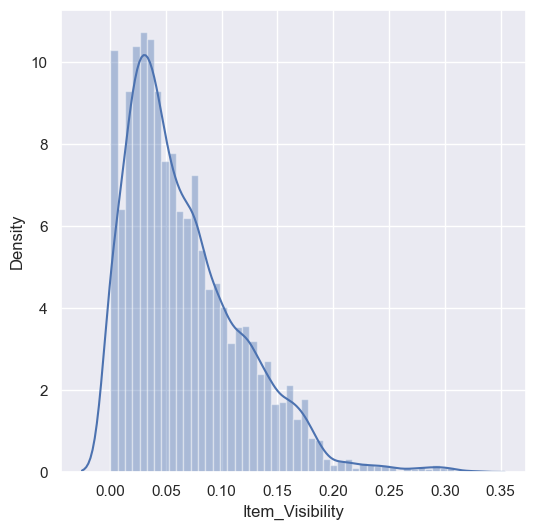

In [22]:
# Item-Visibility Distribution
plt.figure(figsize=(6,6))
sns.distplot(sales_data['Item_Visibility'])
plt.show()

C:\Users\subit\AppData\Local\Temp\ipykernel_5592\779013188.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_MRP'])


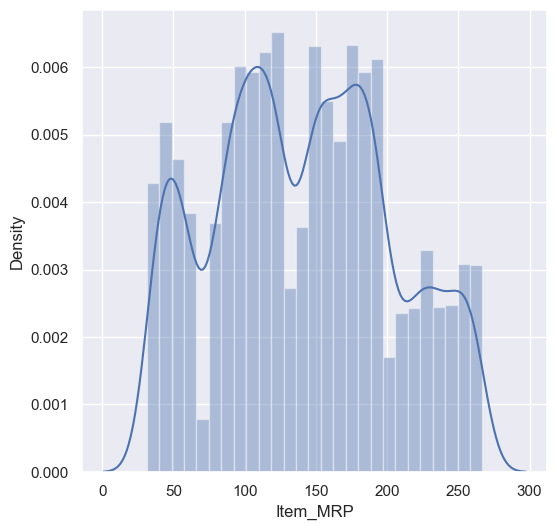

In [23]:
# Item-MRP Distribution
plt.figure(figsize=(6,6))
sns.distplot(sales_data['Item_MRP'])
plt.show()

C:\Users\subit\AppData\Local\Temp\ipykernel_5592\1929778698.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_Outlet_Sales'])


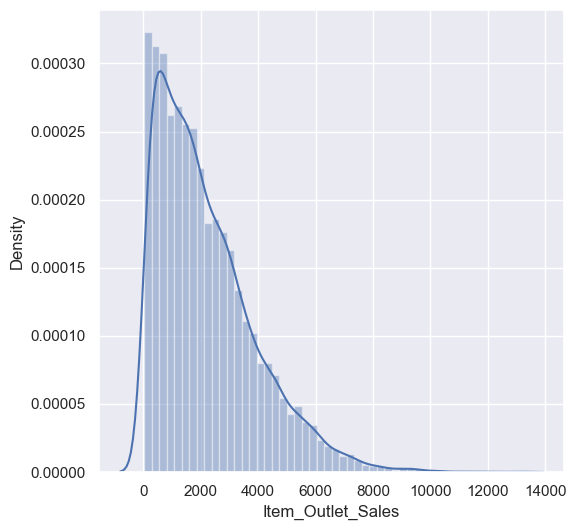

In [24]:
# Item_Outlet_Sales Distribution
plt.figure(figsize=(6,6))
sns.distplot(sales_data['Item_Outlet_Sales'])
plt.show()

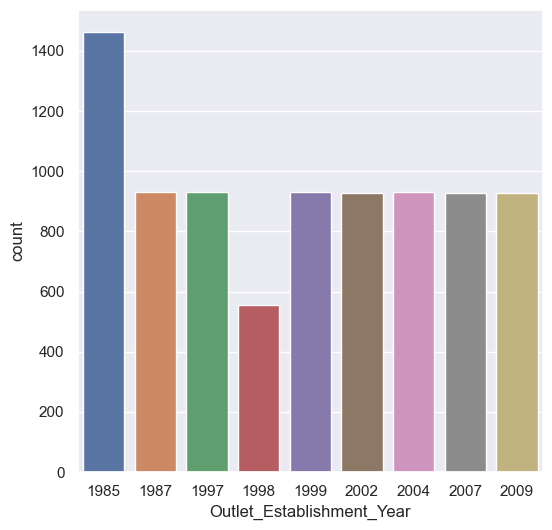

In [25]:
# Outlet_Establishment_Year distribution
plt.figure(figsize=(6,6))
sns.countplot(x = 'Outlet_Establishment_Year', data = sales_data)
plt.show()

### Categorical Feature Plot

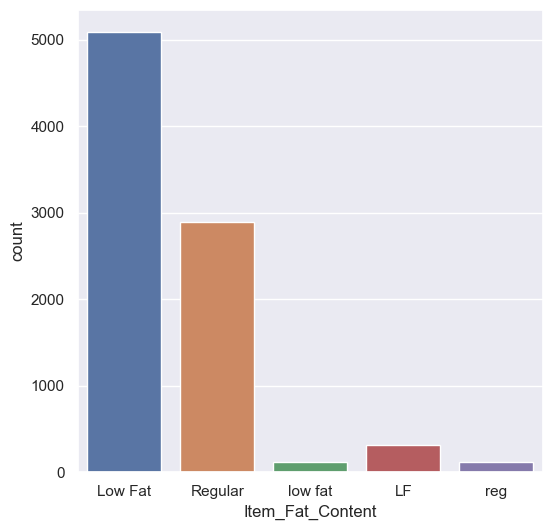

In [26]:
# Item_Fat_Content Plot
plt.figure(figsize=(6,6))
sns.countplot(x = 'Item_Fat_Content', data = sales_data)
plt.show()

Data is not clean as we can see there are 3 low fat with different cases and short form. Also, we can similar problem in case Regular

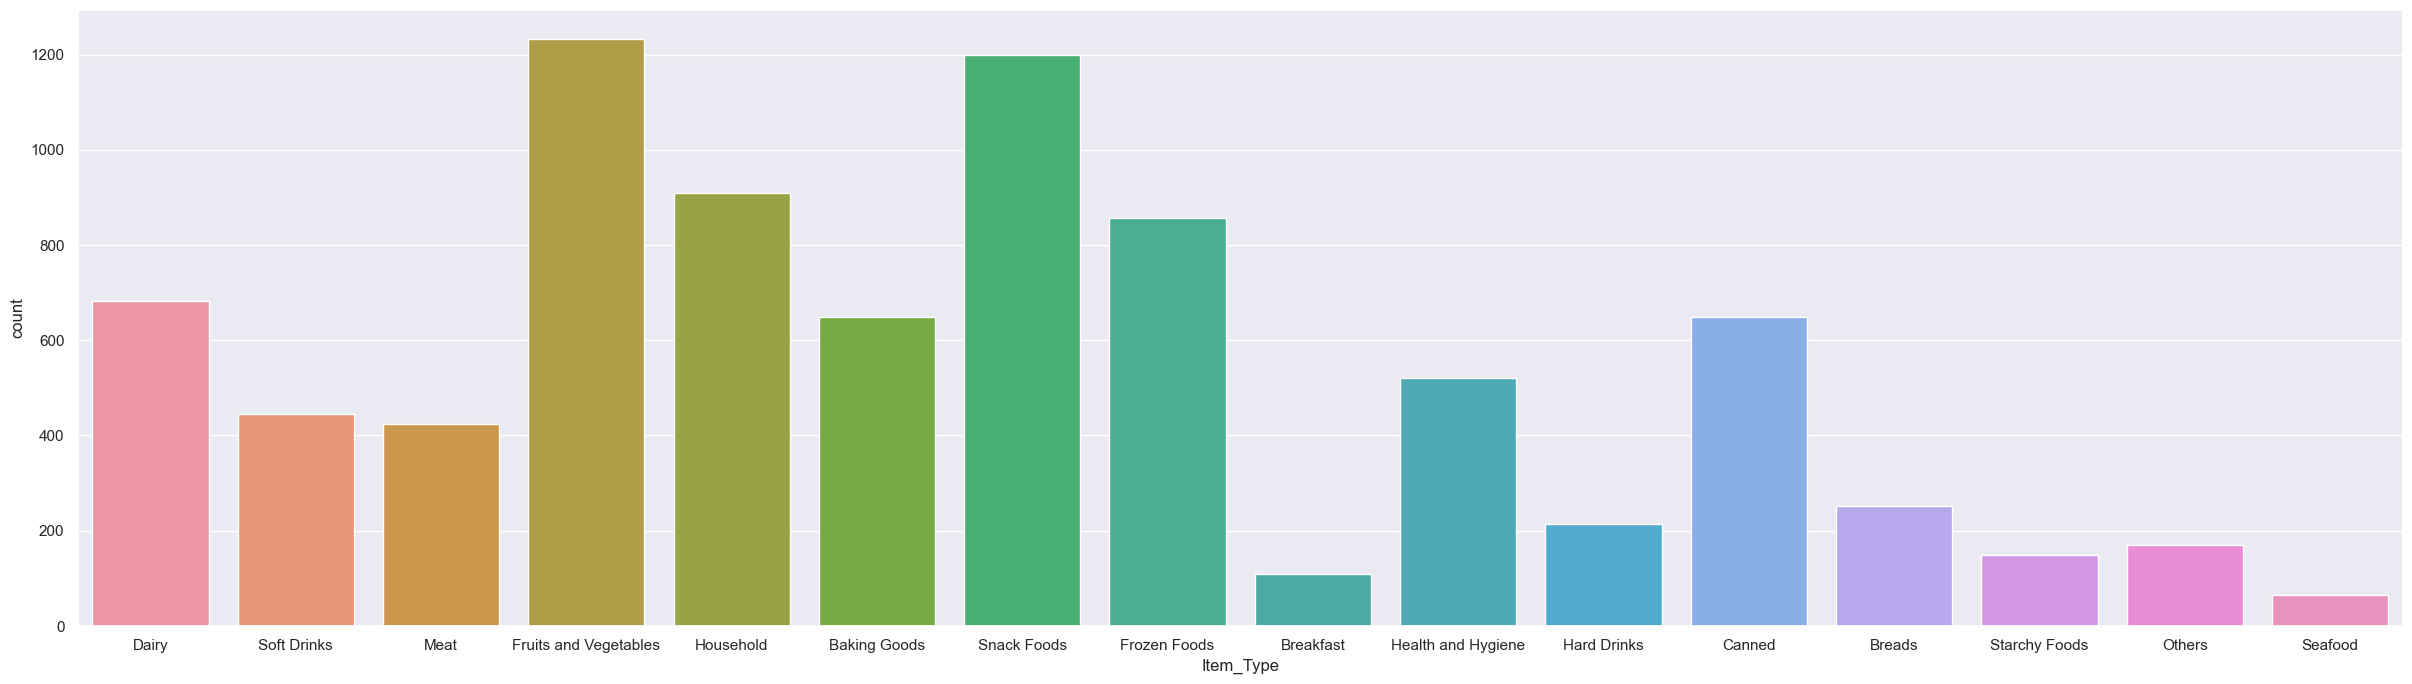

In [28]:
# Item_Type plot
plt.figure(figsize=(30,8))
sns.countplot(x = 'Item_Type', data = sales_data)
plt.show()

In [34]:
sales_data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3        Small
4         High
         ...  
8518      High
8519     Small
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

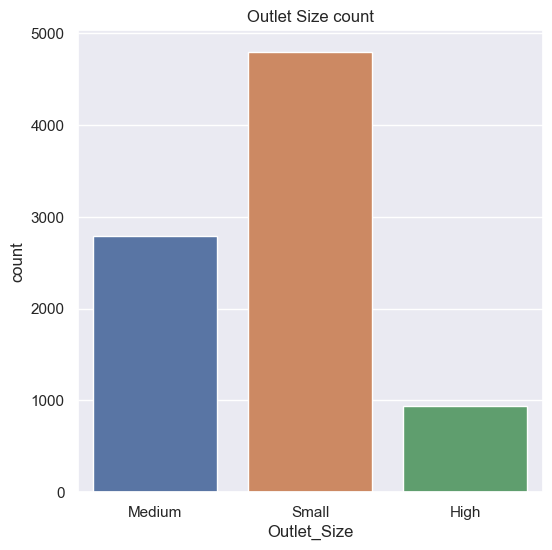

In [35]:
# Outlet_Size plot
plt.figure(figsize=(6,6))
sns.countplot(x = 'Outlet_Size', data = sales_data)
plt.title('Outlet Size count')
plt.show()

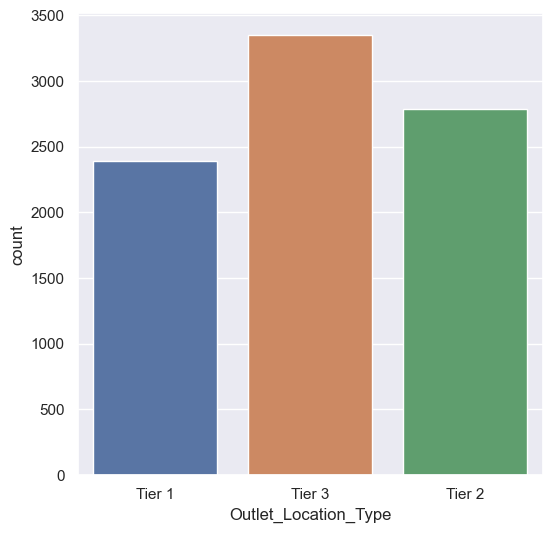

In [37]:
# Outlet_Location_Type plot
plt.figure(figsize=(6,6))
sns.countplot(x = 'Outlet_Location_Type', data = sales_data)
plt.show()

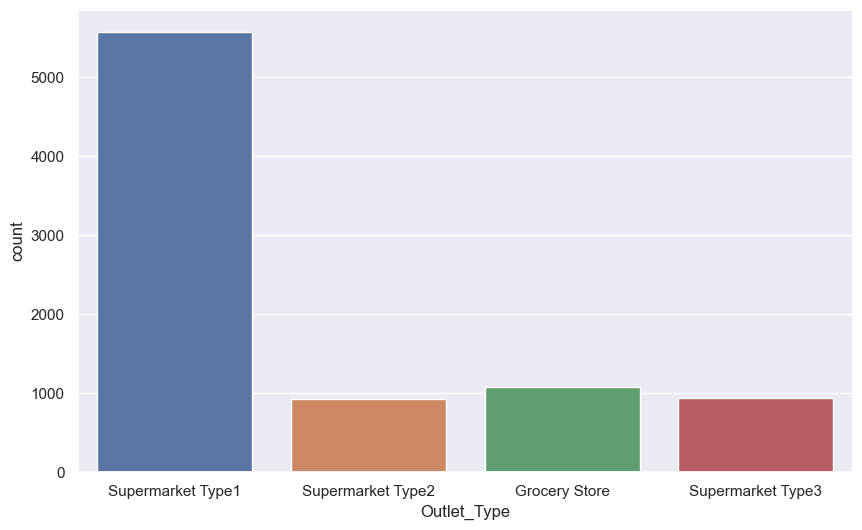

In [42]:
# Outlet_Type plot
plt.figure(figsize=(10,6))
sns.countplot(x = 'Outlet_Type', data = sales_data)
plt.show()

## Data Preprocessing

In [43]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [44]:
# Cleaning the'Item_Fat_Content' column
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [45]:
sales_data.replace({'Item_Fat_Content':{'low fat': 'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}}, inplace = True)

In [46]:
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Label Encoding

In [47]:
encoder = LabelEncoder()

In [51]:
sales_data['Item_Identifier'] = encoder.fit_transform(sales_data['Item_Identifier'])
sales_data['Item_Fat_Content'] = encoder.fit_transform(sales_data['Item_Fat_Content'])
sales_data['Item_Type'] = encoder.fit_transform(sales_data['Item_Type'])
sales_data['Outlet_Identifier'] = encoder.fit_transform(sales_data['Outlet_Identifier'])
sales_data['Outlet_Size'] = encoder.fit_transform(sales_data['Outlet_Size'])
sales_data['Outlet_Location_Type'] = encoder.fit_transform(sales_data['Outlet_Location_Type'])
sales_data['Outlet_Type'] = encoder.fit_transform(sales_data['Outlet_Type'])

In [52]:
sales_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [53]:
# Splitting features and Target
X = sales_data.drop(columns = 'Item_Outlet_Sales', axis = 1)
Y = sales_data['Item_Outlet_Sales']

In [54]:
print(X)
print(Y)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

## Splitting the data into training and testing data

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

In [120]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(8523, 11) (7670, 11) (853, 11)
(8523,) (7670,) (853,)


## Model training and evaluation

### XGBoost Regressor

In [114]:
model = XGBRegressor()

In [115]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [116]:
#  Evaluation for trained data
trained_predict = model.predict(X_train)

In [143]:
# R2 score for trained data
r2_trained = metrics.r2_score( Y_train, trained_predict)
r2_trained

0.9375418436087201

In [118]:
# Evaluation of test data
test_predict = model.predict(X_test)

In [144]:
# R2 score for test data
r2_test = metrics.r2_score( Y_test, test_predict)
r2_test

0.5674497228540715

### Random Forest Regressor

In [122]:
model1 = RandomForestRegressor()

In [125]:
model1.fit(X_train, Y_train)

RandomForestRegressor()

In [153]:
# Evaluation for trained data
trained1_predict = model1.predict(X_train)
r2_trained1 = metrics.r2_score(Y_train, trained1_predict)
r2_trained1

0.9375418436087201

In [129]:
# Evaluation of test data
test_predict1 = model1.predict(X_test)

In [146]:
# R2 score for test data
r2_test1 = metrics.r2_score( Y_test, test_predict1)
r2_test1

0.5674497228540715

### Linear Regression

In [132]:
model2 = LinearRegression()

In [133]:
model2.fit(X_train, Y_train)

LinearRegression()

In [154]:
# EValuation for trained data
trained2_predict = model2.predict(X_train)
r2_trained2 = metrics.r2_score( Y_train, trained2_predict)
r2_trained2

0.5030274397300731

In [148]:
# Evaluation of test data
test_predict2 = model2.predict(X_test)
r2_test2 = metrics.r2_score( Y_test, test_predict2)
r2_test2

0.5080317759616186